<a href="https://www.kaggle.com/code/faridjamalov/https-www-kaggle-com-code-faridjamalov-cnn-br?scriptVersionId=263826244" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [16]:
import os
import tensorflow as tf

# ------------------------------
# Step 0: Suppress unnecessary TF warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Hides INFO and WARNING logs
# ------------------------------

# ------------------------------
# Step 1: Inspect Kaggle input directory
data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

print("Classes:", os.listdir(data_dir))
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        print(folder, ":", len(os.listdir(folder_path)))
# ------------------------------

# ------------------------------
# Step 2: Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth to avoid pre-allocating full GPU memory
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPU(s) detected: {gpus}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected. Using CPU.")

# Optional: confirm TensorFlow version and available devices
print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())
# ------------------------------



Classes: ['no', 'yes']
no : 98
yes : 155
GPU(s) detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
TensorFlow version: 2.18.0
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator with augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    shear_range=0.2,          # Random shear
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    validation_split=0.2      # 20% for validation
)

# Training generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),   # Resize images
    batch_size=32,
    class_mode='binary',      # Binary classification
    subset='training',
    shuffle=True
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758639905.321682      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758639905.322347      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1758639910.101279     134 service.cc:148] XLA service 0x7f1dec004e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758639910.102239     134 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758639910.102260     134 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758639910.440789     134 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/7 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.5312 - loss: 0.6927

I0000 00:00:1758639914.077367     134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 904ms/step - accuracy: 0.5827 - loss: 0.7247 - val_accuracy: 0.7000 - val_loss: 0.5824
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.6871 - loss: 0.6025 - val_accuracy: 0.7000 - val_loss: 0.7189
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.7921 - loss: 0.5104 - val_accuracy: 0.7200 - val_loss: 0.6085
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.7549 - loss: 0.5462 - val_accuracy: 0.7200 - val_loss: 0.5604
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - accuracy: 0.7866 - loss: 0.5010 - val_accuracy: 0.7000 - val_loss: 0.6143
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.7700 - loss: 0.4711 - val_accuracy: 0.8000 - val_loss: 0.5223
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.7891 - loss: 0.4960 - val_accuracy: 0.8000 - val_loss: 0.5072
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.7766 - loss: 0.4643 - val_accuracy: 0.7600 - val_loss: 0.5080
Ep

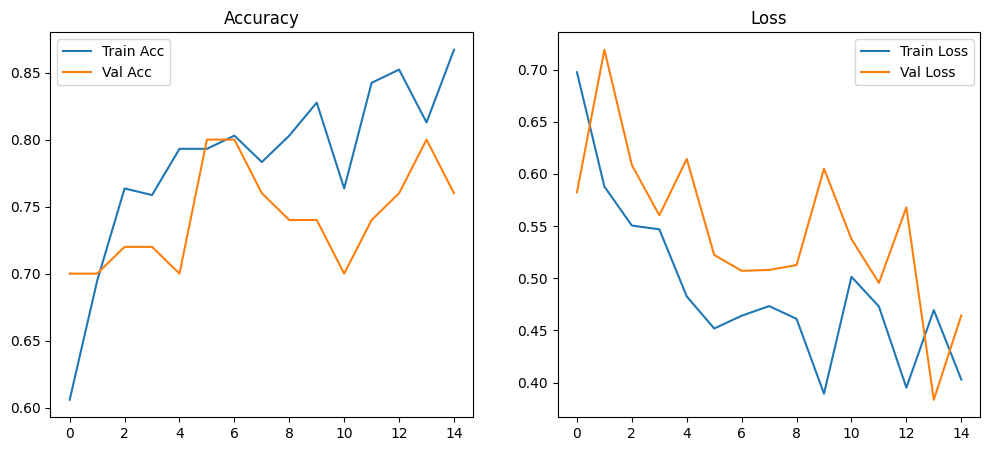

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step


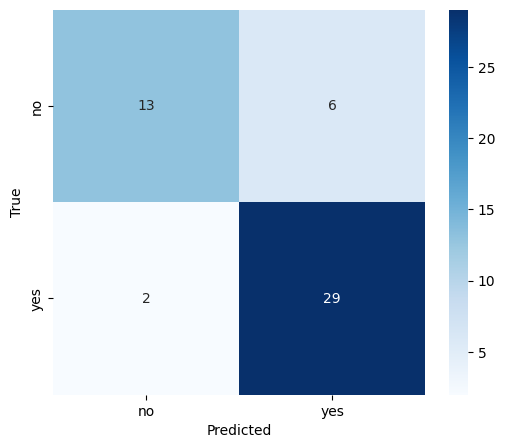

              precision    recall  f1-score   support

          no       0.87      0.68      0.76        19
         yes       0.83      0.94      0.88        31

    accuracy                           0.84        50
   macro avg       0.85      0.81      0.82        50
weighted avg       0.84      0.84      0.84        50



AttributeError: The layer sequential has never been called and thus has no defined output.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import cv2

# -----------------------------
# 1️⃣ Data Generators (senin kodundan)
data_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# -----------------------------
# 2️⃣ CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# 3️⃣ Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)

# -----------------------------
# 4️⃣ Plot Accuracy & Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

# -----------------------------
# 5️⃣ Confusion Matrix & Classification Report
val_steps = validation_generator.samples // validation_generator.batch_size + 1
preds = model.predict(validation_generator, steps=val_steps)
y_pred = (preds > 0.5).astype(int).ravel()
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices, yticklabels=validation_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

# -----------------------------
# 6️⃣ Grad-CAM Example (1 test image)
def get_gradcam(model, img_array, layer_name='conv2d_2'):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Load a test image from validation set
img_path = validation_generator.filepaths[0]
img = tf.keras.utils.load_img(img_path, target_size=(150,150))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

heatmap = get_gradcam(model, img_array)

plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap
plt.title("Grad-CAM")
plt.axis('off')
plt.show()


In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = (model.predict(validation_generator) > 0.5).astype(int).ravel()
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_true, y_pred))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))


In [ ]:
img_path = validation_generator.filepaths[0]
# Load image, preprocess, get heatmap, overlay


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

# -----------------------------
# 1️⃣ Tahminleri al
val_steps = validation_generator.samples // validation_generator.batch_size + 1
y_pred_probs = model.predict(validation_generator, steps=val_steps)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()
y_true = validation_generator.classes

# -----------------------------
# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=validation_generator.class_indices, 
            yticklabels=validation_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# -----------------------------
# 3️⃣ Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

# -----------------------------
# 4️⃣ Grad-CAM Fonksiyonu
def get_gradcam(model, img_array, layer_name='conv2d_2'):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:,0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# 5️⃣ Örnek Grad-CAM Görselleştirme
img_path = validation_generator.filepaths[0]
img = tf.keras.utils.load_img(img_path, target_size=(150,150))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

heatmap = get_gradcam(model, img_array)

plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.5)  # Overlay heatmap
plt.title("Grad-CAM")
plt.axis('off')
plt.show()


In [ ]:
# A simple Grad-CAM function adapted for Keras
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

# Load data from a directory
train_generator = datagen.flow_from_directory(
    'path/to/your/dataset/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'path/to/your/dataset/Training',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load the test set separately without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'path/to/your/dataset/Testing',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/dataset/Training'

In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get true labels and predicted labels from the test generator
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Print classification report
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

NameError: name 'test_generator' is not defined